In [1]:
import pandas as pd
import numpy as np

In [3]:
M = np.array([[7,2],[1,8]])

In [9]:
np.array([[7,2],[1,8]])@np.array([2,-1])

array([12, -6])

In [8]:
np.array([[7,2],[1,8]])@np.array([1,1])

array([9, 9])

Для вычисления собственных чисел в библиотеке numpy предусмотрена специальная функция np.linalg.eig(). Эта функция возвращает кортеж, который состоит из собственных чисел и матрицы, составленной из собственных векторов, соответствующей собственным числам (собственные векторы записаны в столбцы матрицы).

Давайте решим с помощью Python примеры, которые мы рассматривали в видео. Но предварительно импортируем библиотеку numpy:

#### ПРИМЕР №1
Найдите собственные числа и собственные вектора матрицы:

![](https://lms.skillfactory.ru/assets/courseware/v1/af457a5d112e7d476bd48a133719ddbc/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-math-ml-3-1.png)

Решение на Python:
```python
# создаем матрицу А
A = np.array([
    [3, 1],
    [2, 2]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)
```

In [13]:
A = np.array([
    [2, 1],
    [1, 2]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [3. 1.]
Собственные векторы: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


#### ПРИМЕР №5

Посмотрим на то, как найти спектр корреляционной матрицы на реальной задаче. Возьмём знакомый нам классический датасет о домах в Бостоне. 

In [14]:
from sklearn import datasets 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# загружаем датасет
boston = datasets.load_boston()
#print(boston['DESCR'])
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['PRICE']=boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Составим матрицу наблюдений, в которую войдут все исходные факторы и вектор целевой переменной: 

In [15]:
A = boston_data.drop('PRICE', axis=1)
y = boston_data[['PRICE']]

Затем составим корреляционную матрицу для исходных факторов:

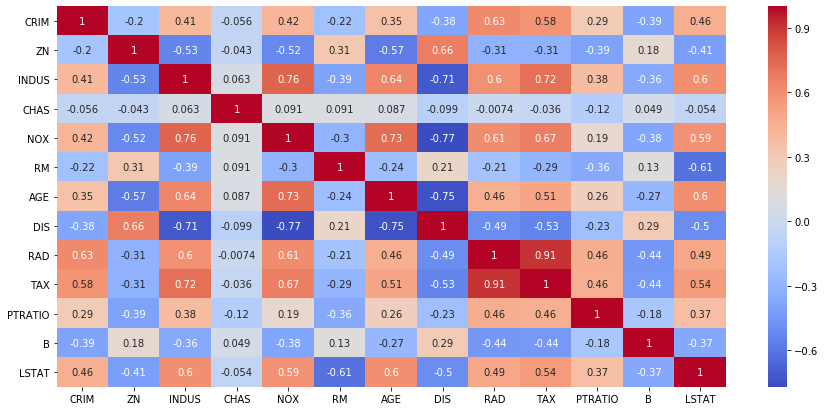

In [17]:
C = A.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(C, annot=True, cmap='coolwarm');

А теперь найдём собственные числа полученной корреляционной матрицы:

In [18]:
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
#print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [24]:
print(np.round(eig_vectors.T @ eig_vectors, 2))

[[ 1. -0.  0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0.]
 [-0.  1. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.  0.]
 [ 0. -0.  1.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0.]
 [ 0. -0.  0.  1. -0. -0.  0.  0.  0. -0. -0. -0. -0.]
 [ 0. -0.  0. -0.  1.  0.  0.  0. -0.  0.  0. -0.  0.]
 [ 0. -0. -0. -0.  0.  1. -0.  0. -0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0.  0. -0.  1.  0.  0.  0. -0. -0. -0.]
 [ 0. -0. -0.  0.  0.  0.  0.  1. -0.  0.  0. -0. -0.]
 [-0. -0. -0.  0. -0. -0.  0. -0.  1. -0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.  0.  0.  0. -0.  1. -0.  0.  0.]
 [-0. -0. -0. -0.  0.  0. -0.  0.  0. -0.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  1.  0.]
 [ 0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  1.]]


### Задание 4.1
Найдите собственные числа для матрицы:

![](https://lms.skillfactory.ru/assets/courseware/v1/70a09ce72a7f358dbb639db1a585fd16/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-math-ml-3-12.png)   
   
Каждое из собственных чисел округлите до целого.

In [37]:
A = np.array([[1,3,5],
            [4,-4,9],
            [13,7,12]])
eig_val, _ = np.linalg.eig(A)

print('{:.0f}   {:.0f}   {:.0f}'.format(*eig_val))

20   -4   -7


### Задание 4.2
Найдите собственные числа матрицы Грама $A^{T}A$, если:

![](https://lms.skillfactory.ru/assets/courseware/v1/014a09ae4657c3578c496b35f25f1c46/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-math-ml-3-13.png)

Каждое из собственных чисел округлите до целого.

Матрица  является…
* Положительно определённой
* Отрицательно определённой
* Неотрицательно определённой
* Неопределённой

In [48]:
A = np.array([[1,9,4],
             [9,4,7],
             [4,7,12]])
G = A.T@A
eig_values,_ = np.linalg.eig(G)

print('{:.0f}   {:.0f}   {:.0f}'.format(*eig_values))

391   46   16
